In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
buyers_filename = 'cleaned car buyers.csv'
buyers = pd.read_csv(buyers_filename, sep =',', decimal = '.',header = 0, index_col = 0)
buyers

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
0,1219.653846,petrol,Renault,Clio,75.576923,22.10000,5.615385,5633947,3929068,445121,10008136
1,1995.777778,petrol,BMW,320i,126.111111,47.84837,6.444444,2090926,6213366,429229,8733521
2,1408.055556,petrol,Volkswagen,Polo,60.962963,18.19250,5.074074,4881887,3656888,499911,9038686
3,1631.500000,petrol,Peugeot,206,71.333333,20.03375,4.833333,3683364,2296472,306102,6285938
4,1998.500000,petrol,Ford,Mondeo,130.250000,39.97375,1.750000,1818587,8254266,340635,10413488
...,...,...,...,...,...,...,...,...,...,...,...
480,1602.000000,petrol,Honda,Quintet,59.000000,4.96800,3.500000,1473,3050,162,4685
481,1324.500000,petrol,Renault,14,46.750000,9.18075,4.000000,1193,2120,95,3408
482,1908.000000,petrol,Renault,20,73.500000,9.94750,4.750000,509,2400,82,2991
483,1198.000000,petrol,Lada,1200,44.000000,4.53600,4.000000,361,1295,26,1682


### Explore the cars’ total number of owners: Please analyze the composition of the total number of vehicle owners by gender for the top ten vehicles with the most owners.

In [48]:
buyers.sort_values(['Total'], ascending = False).head(10)

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
375,1166.142857,petrol,Ford,Fiesta,68.571429,18.532143,5.714286,12760305,11596040,876752,25233097
95,1650.205128,petrol,Ford,Escort,63.564103,16.208744,4.461538,5357916,10937297,486565,16781778
376,1537.406593,petrol,Volkswagen,Golf,89.461538,31.242154,6.164835,4420689,6856310,655247,11932246
4,1998.500000,petrol,Ford,Mondeo,130.250000,39.973750,1.750000,1818587,8254266,340635,10413488
19,1497.169492,petrol,Ford,Focus,94.033898,30.619322,5.966102,3355129,6407597,408615,10171341
0,1219.653846,petrol,Renault,Clio,75.576923,22.100000,5.615385,5633947,3929068,445121,10008136
5,1279.695652,petrol,Nissan,Micra,67.956522,20.377609,4.869565,5751513,3640369,481611,9873493
2,1408.055556,petrol,Volkswagen,Polo,60.962963,18.192500,5.074074,4881887,3656888,499911,9038686
1,1995.777778,petrol,BMW,320i,126.111111,47.848370,6.444444,2090926,6213366,429229,8733521
120,1994.000000,petrol,Rover,2000,74.000000,17.182000,5.000000,2262426,5070237,256445,7589108


In [326]:
model_grouped = buyers.groupby(['Model']).sum()[['Female', 'Male', 'Unknown', 'Total']].sort_values(by = 'Total', ascending = False).head(10)
model_grouped

,Female,Male,Unknown,Total
Model,,,,
Fiesta,12760305,11596040,876752,25233097
Escort,5357916,10937297,486565,16781778
Golf,4420689,6856310,655247,11932246
Mondeo,1818587,8254266,340635,10413488
Focus,3355129,6407597,408615,10171341
Clio,5633947,3929068,445121,10008136
Micra,5751513,3640369,481611,9873493
Polo,4881887,3656888,499911,9038686
320i,2090926,6213366,429229,8733521


In [158]:
x = np.arange(0, len(manu_grouped.index))

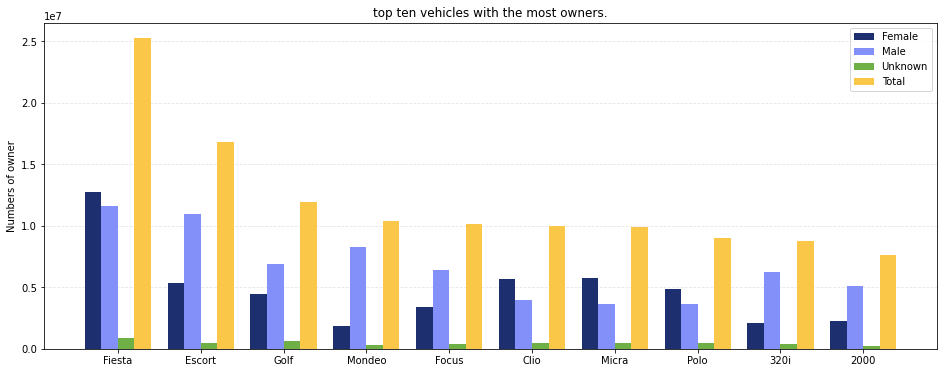

In [159]:
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.bar(x - 0.3, model_grouped['Female'], width = 0.2, color = '#1D2F6F', label = 'Female')
plt.bar(x - 0.1, model_grouped['Male'], width = 0.2, color = '#8390FA', label = 'Male')
plt.bar(x + 0.1, model_grouped['Unknown'], width = 0.2, color = '#6EAF46', label = 'Unknown')
plt.bar(x + 0.3, model_grouped['Total'], width = 0.2, color = '#FAC748', label = 'Total')

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

plt.title('top ten vehicles with the most owners.')
plt.ylabel('Numbers of owner')
plt.legend(['Female', 'Male', 'Unknown', 'Total'])
plt.xticks(x, model_grouped.index)
plt.show()

<AxesSubplot:xlabel='Model'>

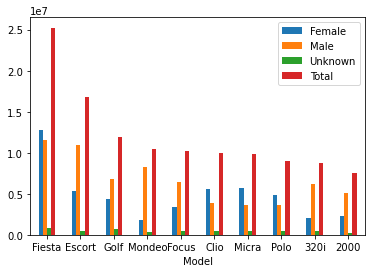

In [161]:
model_groupedd = model_grouped.plot.bar(rot=0)
model_groupedd
# shorter way

### Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the Price and Power columns, but it is not sure which car’s information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.

In [211]:
engine_cc_filename = 'Engine CC.csv'
female_filename = 'Female.csv'
fuel_filename = 'Fuel.csv'
male_filename = 'Male.csv'
manufacturer_filename = 'Manufacturer.csv'
model_filename = 'Model.csv'
power_filename = 'Power.csv'
price_filename = 'Price.csv'
total_filename = 'Total.csv'
transmission_filename = 'Transmission.csv'
unknown_filename = 'Unknown.csv'
engine_cc = pd.read_csv(engine_cc_filename, sep = ',',decimal='.',header= 0, index_col = 0)
female = pd.read_csv(female_filename, sep = ',',decimal='.',header= 0, index_col = 0)
fuel = pd.read_csv(fuel_filename, sep = ',',decimal='.',header= 0, index_col = 0)
male = pd.read_csv(male_filename, sep = ',',decimal='.',header= 0, index_col = 0)
manufacturer = pd.read_csv(manufacturer_filename, sep = ',',decimal='.',header= 0, index_col = 0)
model = pd.read_csv(model_filename, sep = ',',decimal='.',header= 0, index_col = 0)
power = pd.read_csv(power_filename, sep = ',',decimal='.',header= 0, index_col = 0)
price = pd.read_csv(price_filename, sep = ',',decimal='.',header= 0, index_col = 0)
total = pd.read_csv(total_filename, sep = ',',decimal='.',header= 0, index_col = 0)
transmission = pd.read_csv(transmission_filename, sep = ',',decimal='.',header= 0, index_col = 0)
unknown = pd.read_csv(unknown_filename, sep = ',',decimal='.',header= 0, index_col = 0)

merged_df = engine_cc.join(fuel).join(manufacturer).join(model).join(power).join(price).join(transmission).join(female).join(male).join(unknown).join(total)
merged_df.head(76)

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
0,1497.169492,petrol,Ford,Focus,-94.033898,30.619322,5.966102,422731,814172,"56,487",1293390
1,1166.142857,petrol,Ford,Fiesta,68.571429,18.532143,5000.714286,631666,554879,"54,057",1240602
2,1537.406593,petrol,Volkswagen,Golf,-89.461538,31.242154,6.164835,310604,483216,"47,563",841383
3,1219.653846,petrol,Renault,Clio,75.576923,22.100000,5.615385,312556,241287,"28,004",581847
4,1995.777778,petrol,BMW,320i,126.111111,47.848370,6.444444,115843,408016,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...
71,1095.777778,petrol,Fiat,Panda,52.444444,10.423889,5.000000,"42,772","34,789","4,671","82,232"
72,1515.282051,petrol,Toyota,Auris,85.692308,26.973462,3.076923,"30,032","47,251","4,747","82,030"
73,1698.640000,petrol,Peugeot,306,67.000000,18.642640,4.840000,"26,596","50,801","3,897","81,294"
74,1366.294118,petrol,Peugeot,106,53.882353,12.355882,4.647059,"35,920","41,148","3,722","80,790"


In [220]:
error_price = (merged_df['Price']<= 0.0) | (merged_df['Price']> 650)
price = merged_df[error_price]

In [221]:
error_power = (merged_df['Power'] <= 0)  | (merged_df['Power'] > 500.0)
power = merged_df[error_power]

In [222]:
error_df = [power, price]
error_df_final = pd.concat(error_df)
error_df_final

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
0,1497.169492,petrol,Ford,Focus,-9.403390e+01,30.619322,5.966102,422731,814172,"56,487",1293390
2,1537.406593,petrol,Volkswagen,Golf,-8.946154e+01,31.242154,6.164835,310604,483216,"47,563",841383
42,1462.362500,petrol,Citroen,C6,7.060012e+04,2.260250,7.950000,"42,130","79,604","5,547",127281
43,1462.362500,petrol,Mini,Two,8.012012e+04,3.560250,5.950000,"42,130","79,604","5,547",127281
46,2261.193548,petrol,Toyota,RAV5,5.370355e+06,4.354852,1.354839,"54,005","59,395","8,166",121566
51,998.000000,petrol,Hyundai,I11,5.177778e+05,1.601100,5.000000,"63,346","39,242","4,208",106796
41,1462.362500,petrol,Citroen,C5,1.200000e-01,290050.260250,5.950000,"42,130","79,604","5,547",127281
659,1405.000000,petrol,Rover,CityRover,6.300000e+01,-11.740000,5.000000,"3,148","2,725",443,"6,316"
670,1329.000000,petrol,Toyota,Verso-S,7.300000e+01,-22.047000,3.600000,"1,976","3,117",357,"5,450"


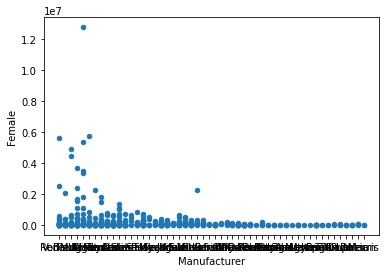

In [254]:
# buyers.plot(kind='scatter',x='Manufacturer',y='Female')
# plt.show()

Highest Price:  646.605
Lowest price:  3.3322


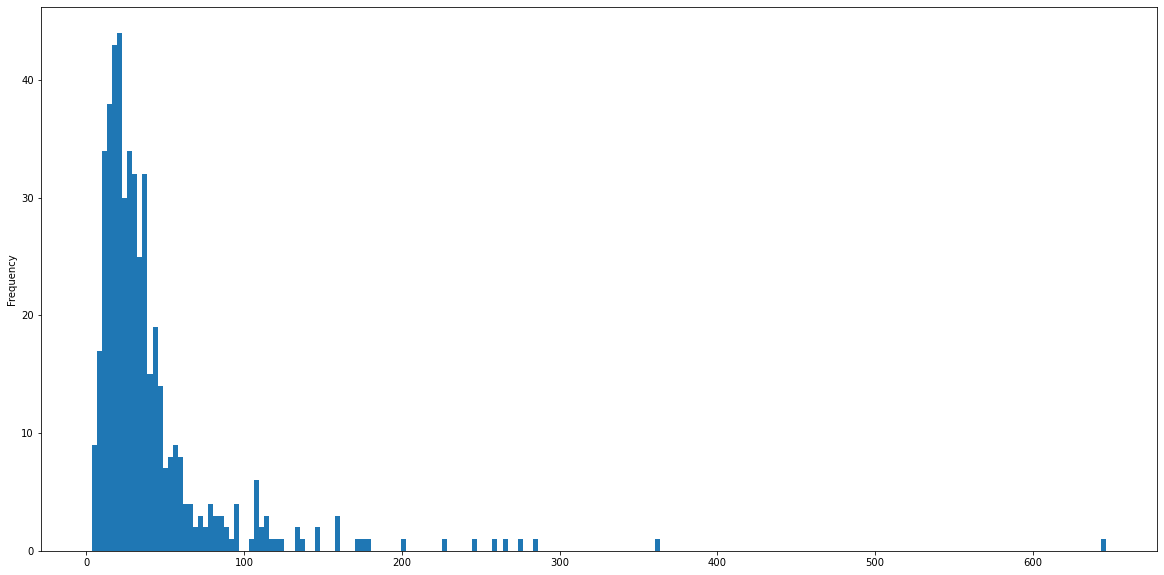

In [303]:
# bins = np.arange(0,700,5)
buyers['Price'].plot(kind='hist',bins=200,figsize=(20,10),range = [min(buyers['Price']),max(buyers['Price'])])
print('Highest Price: ', max(buyers['Price']))
print('Lowest price: ', min(buyers['Price']))
# plt.xlim(xmin=0, xmax = 700)

Highest Power:  450.0
Lowest Power:  15.6


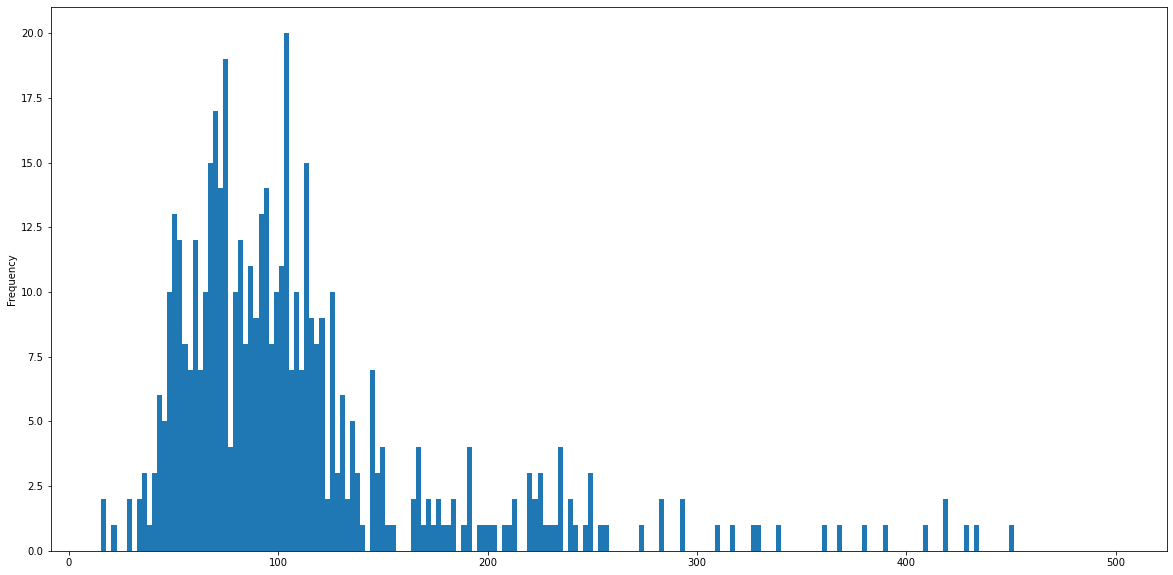

In [309]:
buyers['Power'].plot(kind='hist',bins=200,figsize=(20,10),range = [min(buyers['Power']),500])
print('Highest Power: ', max(buyers['Power']))
print('Lowest Power: ', min(buyers['Power']))
# plt.xlim(xmin=0, xmax = 700)

### Please analyze the relationship between the number of Male owners and the rest features (columns). Please use at least three other columns.

#### Male vs Manufacturer

In [310]:
male_sort = buyers.sort_values(['Male'], ascending = False)
male_sort

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
375,1166.142857,petrol,Ford,Fiesta,68.571429,18.532143,5.714286,12760305,11596040,876752,25233097
95,1650.205128,petrol,Ford,Escort,63.564103,16.208744,4.461538,5357916,10937297,486565,16781778
4,1998.500000,petrol,Ford,Mondeo,130.250000,39.973750,1.750000,1818587,8254266,340635,10413488
376,1537.406593,petrol,Volkswagen,Golf,89.461538,31.242154,6.164835,4420689,6856310,655247,11932246
19,1497.169492,petrol,Ford,Focus,94.033898,30.619322,5.966102,3355129,6407597,408615,10171341
...,...,...,...,...,...,...,...,...,...,...,...
472,2037.273810,diesel,Ford,Transit,93.934524,31.460339,6.011905,333,902,43,1278
369,1832.333333,diesel,Citroen,DS5,123.266667,42.557333,6.000000,160,882,39,1081
354,1998.000000,petrol,Mini,John,170.000000,44.852000,6.500000,482,843,61,1386
339,1684.304348,petrol,Mini,Paceman,104.217391,37.722478,6.000000,1006,786,96,1888


In [317]:
manu_male = buyers.groupby(['Manufacturer']).sum()['Male'].sort_values(ascending = False)
manu_male

Manufacturer
Ford            49931360
Peugeot         16305828
Volkswagen      15681009
Renault         12964147
BMW             10556504
Nissan           9604702
Toyota           9188766
Citroen          8054974
Mercedes         6811211
Rover            6658408
Honda            6260393
Audi             6150874
Volvo            4782834
Land-Rover       4315524
Mazda            3639764
Fiat             3632616
Skoda            2859201
Jaguar           2321186
Saab             2238877
Seat             2080992
Hyundai          2076842
Suzuki           1992200
Mitsubishi       1348999
Kia              1297337
Porsche           834367
Subaru            768390
Alfa-Romeo        764932
Daewoo            599243
Chrysler          539371
MG                539164
Mini              488144
Chevrolet         251430
Lada              204260
Datsun            186263
Triumph           173097
Smart             157925
Opel              156259
Daihatsu          147817
Lotus             108737
Aston-Martin

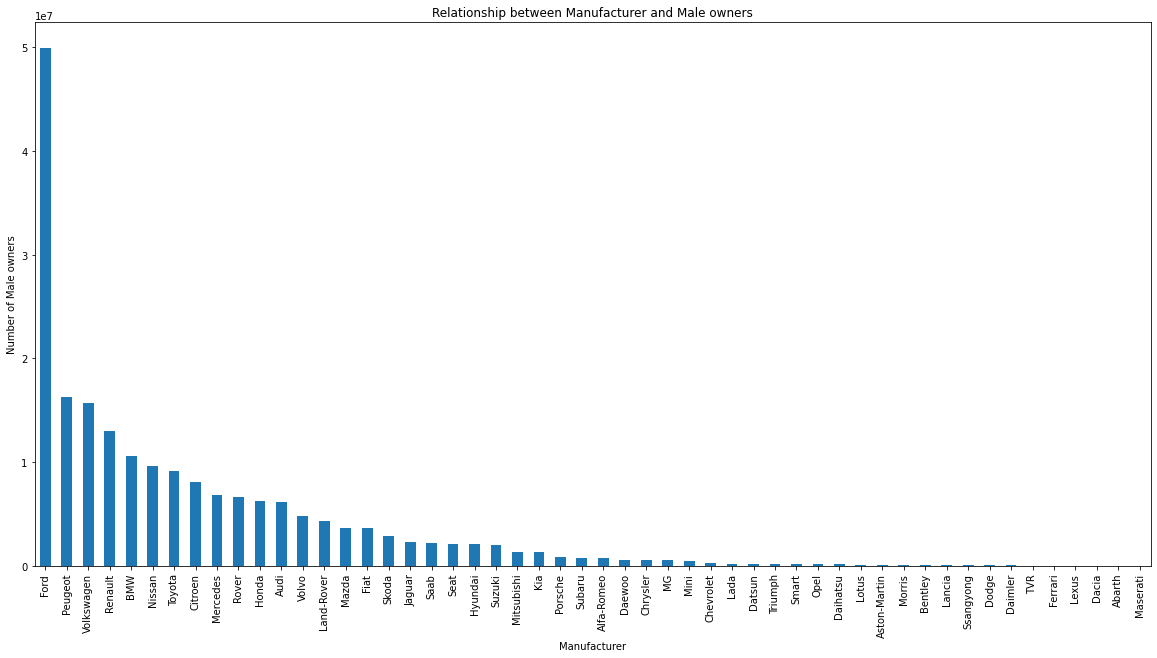

In [324]:
manu_male.plot.bar(figsize = (20,10))
plt.title('Relationship between Manufacturer and Male owners')
plt.ylabel('Number of Male owners')
plt.show()

#### Power vs Male

In [355]:
model_male = buyers.groupby(['Power']).sum()['Male']
model_male

Power
15.600000      60665
18.000000      20184
22.333333       5991
29.000000     201746
30.000000      29951
               ...  
419.000000      4169
420.000000    143077
428.200000     52397
433.500000      6999
450.000000     25353
Name: Male, Length: 416, dtype: int64

In [416]:
buyers.loc[(buyers['Power'] > 410) & (buyers['Power'] <=450)].sum()['Male']

231995

In [423]:
df1 = pd.DataFrame({'Power': ['Power <= 20', '20 < power <= 50', '50 < power <= 80', '80 < power <= 110', '110 < power <= 140','140 < power <= 170', '170 < power <= 200', '200 < power <= 230', '230 < power <= 260', '260 < power <= 290', '290 < power <= 320', '320 < power <= 350', '350 < power <= 380', '380 < power <= 410', '410 < power <= 450'], 'Number of Male owners': [buyers.loc[buyers['Power'] <= 20].sum()['Male'], buyers.loc[(buyers['Power'] > 20) & (buyers['Power'] <=50)].sum()['Male'], buyers.loc[(buyers['Power'] > 50) & (buyers['Power'] <=80)].sum()['Male'], buyers.loc[(buyers['Power'] > 80) & (buyers['Power'] <=110)].sum()['Male'],buyers.loc[(buyers['Power'] > 110) & (buyers['Power'] <=140)].sum()['Male'], buyers.loc[(buyers['Power'] > 140) & (buyers['Power'] <=170)].sum()['Male'], buyers.loc[(buyers['Power'] > 170) & (buyers['Power'] <=200)].sum()['Male'],buyers.loc[(buyers['Power'] > 200) & (buyers['Power'] <=230)].sum()['Male'], buyers.loc[(buyers['Power'] > 230) & (buyers['Power'] <=260)].sum()['Male'], buyers.loc[(buyers['Power'] > 260) & (buyers['Power'] <=290)].sum()['Male'], buyers.loc[(buyers['Power'] > 290) & (buyers['Power'] <=320)].sum()['Male'], buyers.loc[(buyers['Power'] > 320) & (buyers['Power'] <=350)].sum()['Male'], buyers.loc[(buyers['Power'] > 350) & (buyers['Power'] <=380)].sum()['Male'], buyers.loc[(buyers['Power'] > 380) & (buyers['Power'] <=410)].sum()['Male'], buyers.loc[(buyers['Power'] > 410) & (buyers['Power'] <=450)].sum()['Male']]}) 
df1

,Power,Number of Male owners
0,Power <= 20,80849
1,20 < power <= 50,4665505
2,50 < power <= 80,82767388
3,80 < power <= 110,56912629
4,110 < power <= 140,33261786
5,140 < power <= 170,5584263
6,170 < power <= 200,7195202
7,200 < power <= 230,4324236
8,230 < power <= 260,1103691
9,260 < power <= 290,199873


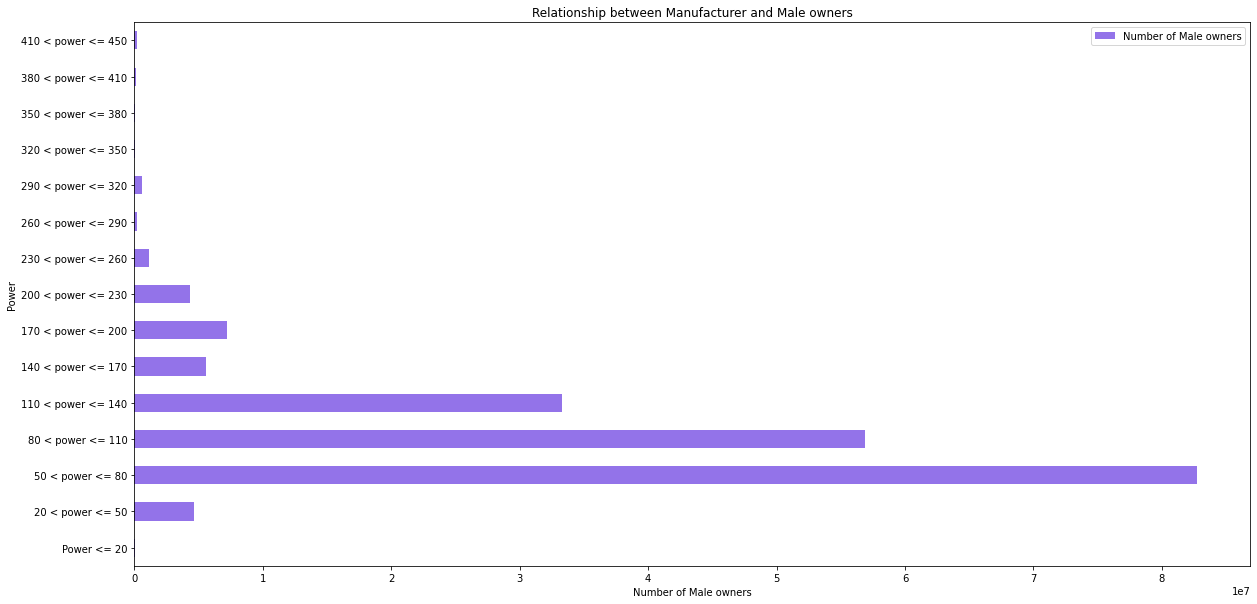

In [428]:
df1.plot.barh(x = 'Power', color = '#9373E9', figsize = (20,10))
plt.title('Relationship between Manufacturer and Male owners')
plt.xlabel('Number of Male owners')
plt.show()

In [453]:
fuel_male = buyers.groupby(['Fuel']).sum()['Male'].sort_values(ascending = False)
fuel_male

Fuel
petrol       181214327
diesel        15793191
automatic        79554
Name: Male, dtype: int64

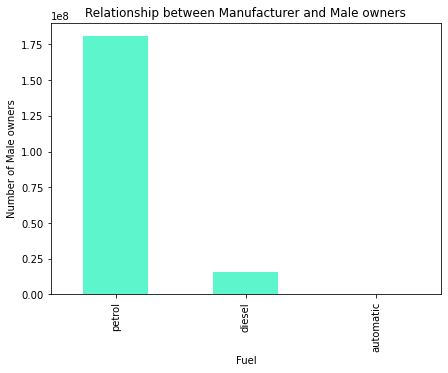

In [480]:
fuel_male.plot.bar(color = '#5DF5CC', figsize = (7,5))
plt.title('Relationship between Manufacturer and Male owners')
plt.ylabel('Number of Male owners')
plt.show()

In [481]:
import pandas as pd

In [482]:
engine_cc_filename = 'Engine CC.csv'
female_filename = 'Female.csv'
fuel_filename = 'Fuel.csv'
male_filename = 'Male.csv'
manufacturer_filename = 'Manufacturer.csv'
model_filename = 'Model.csv'
power_filename = 'Power.csv'
price_filename = 'Price.csv'
total_filename = 'Total.csv'
transmission_filename = 'Transmission.csv'
unknown_filename = 'Unknown.csv'
engine_cc = pd.read_csv(engine_cc_filename, sep = ',',decimal='.',header= 0, index_col = 0)
female = pd.read_csv(female_filename, sep = ',',decimal='.',header= 0, index_col = 0)
fuel = pd.read_csv(fuel_filename, sep = ',',decimal='.',header= 0, index_col = 0)
male = pd.read_csv(male_filename, sep = ',',decimal='.',header= 0, index_col = 0)
manufacturer = pd.read_csv(manufacturer_filename, sep = ',',decimal='.',header= 0, index_col = 0)
model = pd.read_csv(model_filename, sep = ',',decimal='.',header= 0, index_col = 0)
power = pd.read_csv(power_filename, sep = ',',decimal='.',header= 0, index_col = 0)
price = pd.read_csv(price_filename, sep = ',',decimal='.',header= 0, index_col = 0)
total = pd.read_csv(total_filename, sep = ',',decimal='.',header= 0, index_col = 0)
transmission = pd.read_csv(transmission_filename, sep = ',',decimal='.',header= 0, index_col = 0)
unknown = pd.read_csv(unknown_filename, sep = ',',decimal='.',header= 0, index_col = 0)

In [483]:
merged_df = engine_cc.join(fuel).join(manufacturer).join(model).join(power).join(price).join(transmission).join(female).join(male).join(unknown).join(total)
merged_df

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
0,1497.169492,petrol,Ford,Focus,-94.033898,30.619322,5.966102,422731,814172,"56,487",1293390
1,1166.142857,petrol,Ford,Fiesta,68.571429,18.532143,5000.714286,631666,554879,"54,057",1240602
2,1537.406593,petrol,Volkswagen,Golf,-89.461538,31.242154,6.164835,310604,483216,"47,563",841383
3,1219.653846,petrol,Renault,Clio,75.576923,22.100000,5.615385,312556,241287,"28,004",581847
4,1995.777778,petrol,BMW,320i,126.111111,47.848370,6.444444,115843,408016,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...
6097,2304.975610,diesel,Land-Rover,Defender,207.609756,108.747195,7.853659,150,"1,012",80,"1,242"
6098,2261.193548,petrol,Toyota,RAV4,137.774193,43.548516,1.354839,482,670,66,"1,218"
6099,2696.500000,petrol,Alfa-Romeo,Spider,163.500000,55.200000,6.000000,247,790,81,"1,118"
6100,2254.000000,petrol,Honda,Shuttle,110.000000,30.081000,4.000000,416,639,49,"1,104"


In [501]:
# create a model data frame include all the available model in the description
model_df = pd.DataFrame({'Model': ['Clio', '320i', 'Polo', '206', 'Mondeo', 'Micra', 'Civic', 'Ka+',
'Megane', 'Yaris', 'CLA', 'A4', 'Passat', 'A3', '307', '207',
'Xsara', 'Fabia', '118i', 'Freelander', 'C3', 'Corolla', '535i',
'Avensis', 'E', 'Scenic', 'Ibiza', 'Range', 'Qashqai+2', 'Octavia',
'500L', 'A', 'Almera', 'C4', 'C5', 'C6', 'Two', 'One', 'RAV4',
'RAV5', '9-3X', '107', 'Aygo', 'I10', 'I11', 'A6', 'Picanto',
'Note', 'Leon', 'XE', 'Fusion', 'Accord', 'MX-5', '6', 'C1',
'Swift', 'Galaxy', '308', '3', 'TT', 'Laguna', '2', 'Panda',
'Auris', '306', '106', 'V70', 'Saxo', 'Touran', 'Beetle', 'Rio',
'C-MAX', 'X5', 'Juke', 'Vitara', 'Ceed', '406', 'Getz', 'X-Trail',
'CLK', 'S40', '75', 'Berlingo', 'Alto', 'Primera', 'I20', 'SLK',
'S-MAX', 'ML', 'Sportage', '407', 'C2', 'I30', 'XF', 'A1', 'Colt',
'A5', 'S-Type', 'V50', 'Escort', 'XC90', 'V40', 'X3', 'Tiguan',
'B', 'Fortwo', 'Bora', '45', '911', 'XJ', 'Impreza', '09-May',
'Celica', 'Sharan', 'Santa', '208', 'S60', 'DS3', 'Modus', 'ZR',
'Voyager', 'Sorento', 'Z4', '2000', 'Up', 'Jimny', 'Matiz',
'Boxster', 'Wagon', '3008', '323', 'Puma', 'Stilo', 'Scirocco',
'XK', 'Altea', 'C30', 'Accent', 'Lupo', 'Sprinter', 'Ix35',
'Kangoo', '5', 'Jetta', 'Alhambra', 'Espace', 'Ignis', 'SX4',
'Carens', 'Q5', 'Partner', 'Yeti', 'Touareg', 'Seicento', 'Superb',
'Bravo', 'X1', 'Q7', '147', 'MR2', '740i', 'TF', 'S80', 'Fox',
'Twingo', 'Lancer', 'Doblo', 'Eos', 'M3', 'PT', 'Matrix', 'IQ',
'SLS', 'A2', 'Z3', 'C70', 'Roomster', 'Splash', 'Previa',
'Starlet', 'Aveo', 'XC70', 'Tucson', 'Legacy', 'Cayenne', '156',
'640i', 'Spark', 'Kalos', 'Outlander', 'Pixo', 'FR-V', 'Sirion',
'Mini', 'Venga', 'Streetka', 'Felicia', 'Terrano', 'Space',
'Carisma', 'Lacetti', 'ZT', 'CLC', 'Defender', 'Arosa', 'HR-V',
'City-coupe', 'Terios', 'Carina', 'Multipla', 'A8', 'Citigo',
'Liana', 'Continental', 'Captiva', 'Pathfinder', '205', '900',
'B-MAX', '940', 'Toledo', 'Ix20', '850', 'Verso-S', 'S3', '159',
'Lanos', 'C8', '626', 'Sandero', '807', '5008', 'Cayman', '300C',
'300', 'Duster', '1007', '508', 'Xantia', 'RCZ', '350Z', 'Demio',
'S2000', '190', 'Trajet', 'Tacuma', 'GT', 'Premacy', 'ZX', 'V60',
'Brava', 'S4', 'X6', 'Caliber', 'Maverick', 'Streetwise',
'CityRover', 'Cerato', 'Elise', 'Cougar', 'Roadster-coupe',
'Vantage', 'I40', 'Cruze', 'Exeo', 'Urban', 'Mii', 'A7', '405',
'500C', 'Transporter', 'Spider', 'DS4', 'Picnic', 'Viano',
'Ulysse', 'Sierra', 'DB9', '80', 'Neon', 'Terracan', 'M550i',
'Magentis', 'AX', 'RS4', 'Captur', 'Grandis', 'Crossfire', 'CR-Z',
'R', 'Stream', 'Idea', 'Prelude', 'Elantra', '607', 'Rexton', 'CC',
'Roadster', '806', '9000', 'S5', 'Nemo', 'Sonata', 'Capri',
'Sedici', 'Brera', '944', 'Cordoba', 'C-Crosser', 'Cabriolet',
'Cinquecento', 'Galant', 'Qubo', 'Lantra', 'Baleno', '440', 'GS',
'2008', 'S70', 'GT86', 'Caddy', '4007', 'GLK', 'Camry', 'Nitro',
'Sebring', 'Shuma', 'Veloster', 'Patrol', 'Expert', 'R8', 'Wind',
'Rapid', 'DB7', 'Corrado', 'Supra', 'Marea', 'Serena', 'Vaneo',
'Panamera', 'Copen', 'Logo', 'Paceman', '960', 'Tribute', 'M135i',
'Shuttle', 'Trafic', 'Journey', 'Phaeton', 'Justy', 'Orlando',
'Vito', 'Granada', 'Bipper', '370Z', 'RS6', 'John', 'Hilux',
'Legend', 'MX-3', 'GranCabrio', 'Scorpio', 'Rodius', 'Mustang',
'121', 'Coupe', 'Integra', 'Carrera', 'Croma', 'Zafira', 'GT-R',
'DS5', 'Korando', '309', '100', 'Quattro', 'Probe', 'Focus',
'Fiesta', 'Golf', 'Discovery', 'fR', 'Pride', '19', 'Concerto',
'Leganza', 'Bluebird', 'MPV', 'Xedos', 'Pajero', 'Orion', 'Vento',
'Nexia', 'Mentor', '460', '166', 'Maxima', 'Paseo', 'F430', '850i',
'Uno', 'Favorit', '146', 'MX-6', '145', 'Safrane', 'Move', '928',
'Musso', 'Cooper', 'Tipo', 'Espero', 'XM', 'CRX', 'Tuscan', 'Vel',
'21', 'Prairie', 'SJ', 'Esprit', 'Samurai', '360', 'Tempra', '155',
'Barchetta', '90', 'TR7', 'Pony', '605', '25', '164', '11', '505',
'Marbella', 'Acclaim', 'X-90', 'Samara', '305', 'Griffith', '9',
'33', 'Manta', 'Applause', '4', '3.6', 'Delta', 'Silvia', 'Sunny',
'126', 'Tercel', 'Niva', 'Stellar', '99', '120', 'Kadett', '18',
'Dedra', 'Cherry', 'Marina', 'Laurel', 'Regata', '130', 'Thema',
'Stanza', 'Ital', 'Strada', 'Santana', 'Double', '105', 'Malaga',
'Ascona', 'Monza', 'Fuego', 'Derby', '104', 'Transit', 'Prisma',
'Senator', '127', '200', 'Rekord', '929', 'Cressida', 'Quintet',
'14', '20', '1200', '504']}) 
model_df

,Model
0,Clio
1,320i
2,Polo
3,206
4,Mondeo
...,...
484,Quintet
485,14
486,20
487,1200


In [503]:
merged_model = merged_df.merge(model_df, on = 'Model', how = 'right')
merged_model

,Engine CC,Fuel,Manufacturer,Model,Power,Price,Transmission,Female,Male,Unknown,Total
0,1219.653846,petrol,Renault,Clio,75.576923,22.10000,5.615385,312556,241287,"28,004",581847
1,1219.653846,petrol,Renault,Clio,75.576923,22.10000,5.615385,333284,245569,"29,419",608272
2,1219.653846,petrol,Renault,Clio,75.576923,22.10000,5.615385,351104,251904,"30,997",634005
3,1219.653846,petrol,Renault,Clio,75.576923,22.10000,5.615385,363332,258405,"31,372",653109
4,1219.653846,petrol,Renault,Clio,75.576923,22.10000,5.615385,372428,259984,"31,507",663919
...,...,...,...,...,...,...,...,...,...,...,...
5964,1324.500000,petrol,Renault,14,46.750000,9.18075,4.000000,770,"1,351",58,"2,179"
5965,1908.000000,petrol,Renault,20,73.500000,9.94750,4.750000,196,925,30,"1,151"
5966,1908.000000,petrol,Renault,20,73.500000,9.94750,4.750000,313,"1,475",52,"1,840"
5967,1198.000000,petrol,Lada,1200,44.000000,4.53600,4.000000,361,"1,295",26,"1,682"


In [487]:
4+3+17+16+9+5+12+6+1+8+9+10+8+5+1+13

127

In [499]:
merged_model.Model.unique()

array(['Focus', 'Fiesta', 'Golf', 'Clio', '320i', 'Polo', '206', 'Mondeo',
       'Micra', 'Civic', 'Ka+', 'Megane', 'Yaris', 'CLA', 'A4', 'Passat',
       'A3', '307', '207', 'Xsara', 'Fabia', '118i', 'Freelander', 'C3',
       'Corolla', '535i', 'Avensis', 'E', 'Scenic', 'Ibiza', 'Discovery',
       'Range', 'Qashqai+2', 'Octavia', '500L', 'A', 'Almera', 'C4', 'C5',
       'C6', 'Two', 'One', 'RAV4', 'RAV5', '9-3X', '107', 'Aygo', 'I10',
       'I11', 'A6', 'Picanto', 'Note', 'Leon', 'XE', 'Fusion', 'Accord',
       'MX-5', '6', 'C1', 'Swift', 'Galaxy', '308', '3', 'TT', 'Laguna',
       '2', 'Panda', 'Auris', '306', '106', 'V70', 'Saxo', 'Touran',
       'Beetle', 'Rio', 'C-MAX', 'X5', 'Juke', 'Vitara', 'Ceed', '406',
       'Getz', 'X-Trail', 'CLK', 'S40', '75', 'Berlingo', 'Alto',
       'Primera', 'I20', 'SLK', 'S-MAX', 'ML', 'Sportage', '407', 'C2',
       'I30', 'XF', 'A1', 'Colt', 'A5', 'S-Type', 'V50', 'Escort', 'XC90',
       'V40', 'X3', 'Tiguan', 'B', 'Fortwo', 'Bora', '45